# Final project - Advanced Statistical Analysis

### Executive summary

In [85]:
# Importing required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
sns.set(style="ticks", palette="ocean")
sns.despine(ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
%config InlineBackend.figure_format = 'retina'


<Figure size 432x288 with 0 Axes>

In [86]:
df=pd.read_csv("project2.csv")

In [87]:
df.head(10)

,pin14,tri,pdir,pstreet,pcity,tcity,condo,av1,value,taxes,...,poverty,college,squarefoot,beds,walkscore,walkfac,elem_score,high_school_score,avg_school_score,appeal
0,2.033200e+13,Chicago,S,LASALLE,CHICAGO,CHICAGO,Non-condo,11558.0,108000,1585.2000,...,0.408146,0.149720,1223.0,3.0,73,Very Walkable,1,6,4,0.0
1,2.414410e+13,Chicago,S,SAWYER,CHICAGO,CHICAGO,Non-condo,19357.0,215000,3032.4399,...,0.004164,0.223537,1320.0,3.0,55,Somewhat Walkable,10,8,9,0.0
2,1.408420e+13,Chicago,W,AINSLIE,CHICAGO,CHICAGO,Non-condo,76189.0,1364225,11644.6900,...,0.263047,0.344634,4800.0,12.0,82,Very Walkable,5,2,4,4199.0
3,1.419130e+13,Chicago,N,OAKLEY,CHICAGO,CHICAGO,Non-condo,61525.0,1091500,3215.5500,...,0.011499,0.517047,2620.0,4.0,76,Very Walkable,8,10,9,39109.0
4,1.129100e+13,Chicago,W,JUNEWAY,CHICAGO,CHICAGO,Non-condo,44434.0,380000,7200.3799,...,0.323849,0.182889,1976.0,4.0,66,Somewhat Walkable,2,1,2,0.0
5,1.407210e+13,Chicago,W,SUMMERDALE,CHICAGO,CHICAGO,Non-condo,42633.0,379000,3999.4600,...,0.115624,0.324944,1111.0,3.0,84,Very Walkable,7,5,6,0.0
6,1.722310e+13,Chicago,E,18TH,CHICAGO,CHICAGO,Non-condo,60341.0,700000,10827.9800,...,0.121878,0.542263,2400.0,4.0,91,Walker's Paradise,4,4,4,0.0
7,1.433410e+13,Chicago,W,MENOMONEE,CHICAGO,CHICAGO,Non-condo,83075.0,905000,8770.4600,...,0.079787,0.696402,1438.0,4.0,94,Walker's Paradise,7,9,8,9793.0
8,1.405320e+13,Chicago,N,RIDGE,CHICAGO,CHICAGO,Non-condo,84301.0,656250,10377.2000,...,0.142172,0.462252,4950.0,12.0,93,Walker's Paradise,5,7,6,27671.0
9,1.313300e+13,Chicago,N,TROY,CHICAGO,CHICAGO,Non-condo,39731.0,355000,6576.8799,...,0.137874,0.278220,3657.0,9.0,89,Very Walkable,4,2,3,3080.0


In [88]:
df.columns

Index(['pin14', 'tri', 'pdir', 'pstreet', 'pcity', 'tcity', 'condo', 'av1',
       'value', 'taxes', 'homeowner', 'white', 'black', 'hispanic', 'asian',
       'medhinc', 'poverty', 'college', 'squarefoot', 'beds', 'walkscore',
       'walkfac', 'elem_score', 'high_school_score', 'avg_school_score',
       'appeal'],
      dtype='object')

In [89]:
df.dtypes

pin14                float64
tri                   object
pdir                  object
pstreet               object
pcity                 object
tcity                 object
condo                 object
av1                  float64
value                  int64
taxes                float64
homeowner              int64
white                float64
black                float64
hispanic             float64
asian                float64
medhinc              float64
poverty              float64
college              float64
squarefoot           float64
beds                 float64
walkscore              int64
walkfac               object
elem_score             int64
high_school_score      int64
avg_school_score       int64
appeal               float64
dtype: object

In [90]:
df["pin14"]=df["pin14"].astype(str)

In [91]:
df["pin14"]

0        20332000000000.0
1        24144100000000.0
2        14084200000000.0
3        14191300000000.0
4        11291000000000.0
               ...       
19031    15143000000000.0
19032    31194100000000.0
19033    16074200000000.0
19034    24223300000000.0
19035    16064100000000.0
Name: pin14, Length: 19036, dtype: object

In [92]:
df.shape

(19036, 26)

In [93]:
df2=df.dropna()

In [94]:
df2.shape

(4023, 26)

In [95]:
df2.head(5)

,pin14,tri,pdir,pstreet,pcity,tcity,condo,av1,value,taxes,...,poverty,college,squarefoot,beds,walkscore,walkfac,elem_score,high_school_score,avg_school_score,appeal
0,20332000000000.0,Chicago,S,LASALLE,CHICAGO,CHICAGO,Non-condo,11558.0,108000,1585.2000,...,0.408146,0.149720,1223.0,3.0,73,Very Walkable,1,6,4,0.0
1,24144100000000.0,Chicago,S,SAWYER,CHICAGO,CHICAGO,Non-condo,19357.0,215000,3032.4399,...,0.004164,0.223537,1320.0,3.0,55,Somewhat Walkable,10,8,9,0.0
2,14084200000000.0,Chicago,W,AINSLIE,CHICAGO,CHICAGO,Non-condo,76189.0,1364225,11644.6900,...,0.263047,0.344634,4800.0,12.0,82,Very Walkable,5,2,4,4199.0
3,14191300000000.0,Chicago,N,OAKLEY,CHICAGO,CHICAGO,Non-condo,61525.0,1091500,3215.5500,...,0.011499,0.517047,2620.0,4.0,76,Very Walkable,8,10,9,39109.0
4,11291000000000.0,Chicago,W,JUNEWAY,CHICAGO,CHICAGO,Non-condo,44434.0,380000,7200.3799,...,0.323849,0.182889,1976.0,4.0,66,Somewhat Walkable,2,1,2,0.0


In [96]:
df.describe()

,av1,value,taxes,homeowner,white,black,hispanic,asian,medhinc,poverty,college,squarefoot,beds,walkscore,elem_score,high_school_score,avg_school_score,appeal
count,1.899100e+04,1.903600e+04,19036.000000,19036.000000,18914.000000,18914.000000,18914.000000,18914.000000,18914.000000,18914.000000,18914.000000,13915.000000,13915.000000,19036.000000,19036.000000,19036.000000,19036.000000,9.018000e+03
mean,3.036896e+04,3.564597e+05,4972.586580,0.426087,0.625657,0.205279,0.186143,0.139870,67020.153960,0.135024,0.318044,1908.737478,3.648653,69.779838,5.453719,5.394883,5.644411,5.394141e+03
std,2.961622e+04,3.641909e+05,4233.282368,0.494520,0.274867,0.296543,0.214204,0.118632,26266.301109,0.099465,0.212173,1167.077974,1.701771,23.504392,2.406259,2.865633,2.223499,2.029286e+04
min,-1.045572e+06,5.000000e+03,0.000000,0.000000,0.001088,0.000789,0.001889,0.000000,9550.000000,0.003604,0.004178,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,1.534750e+04,1.750000e+05,2479.315050,0.000000,0.499139,0.020925,0.053135,0.053844,47972.000000,0.065292,0.134969,1151.000000,3.000000,55.000000,3.000000,3.000000,4.000000,0.000000e+00
50%,2.367500e+04,2.660000e+05,3940.760000,0.000000,0.703167,0.051095,0.091340,0.099713,63529.000000,0.112022,0.265332,1567.000000,3.000000,75.000000,6.000000,5.000000,6.000000,1.177500e+03
75%,3.680350e+04,4.130000e+05,6088.760125,1.000000,0.851731,0.261715,0.217768,0.194202,84167.000000,0.170868,0.505770,2297.000000,4.000000,89.000000,7.000000,8.000000,7.000000,4.375000e+03
max,7.639090e+05,1.500000e+07,133258.690000,1.000000,0.970822,0.993390,0.979010,0.896609,192143.000000,0.776376,0.766168,27270.000000,24.000000,100.000000,10.000000,10.000000,10.000000,1.164486e+06


In [97]:
keep_cols = df2.columns[df2.nunique() > 1]

In [98]:
numerical_cols = df2[keep_cols].select_dtypes('number').columns

In [99]:
correlation = df2.corr()

<AxesSubplot:>

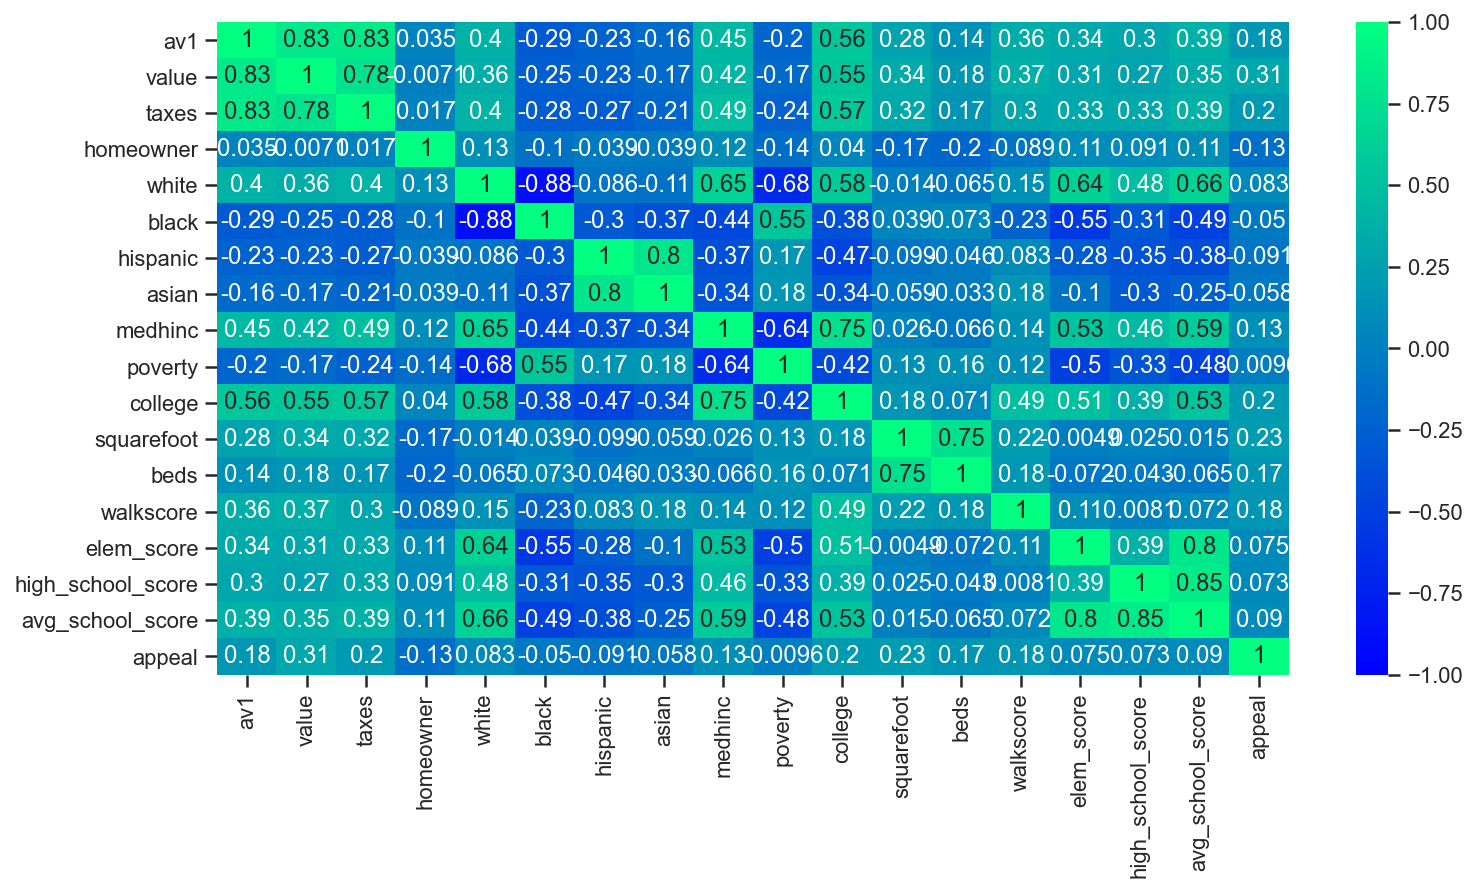

In [100]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, annot = True, cmap  = 'winter', vmax = 1, vmin = -1)

In [101]:
clean_df=df2

/Users/prashantkhorana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

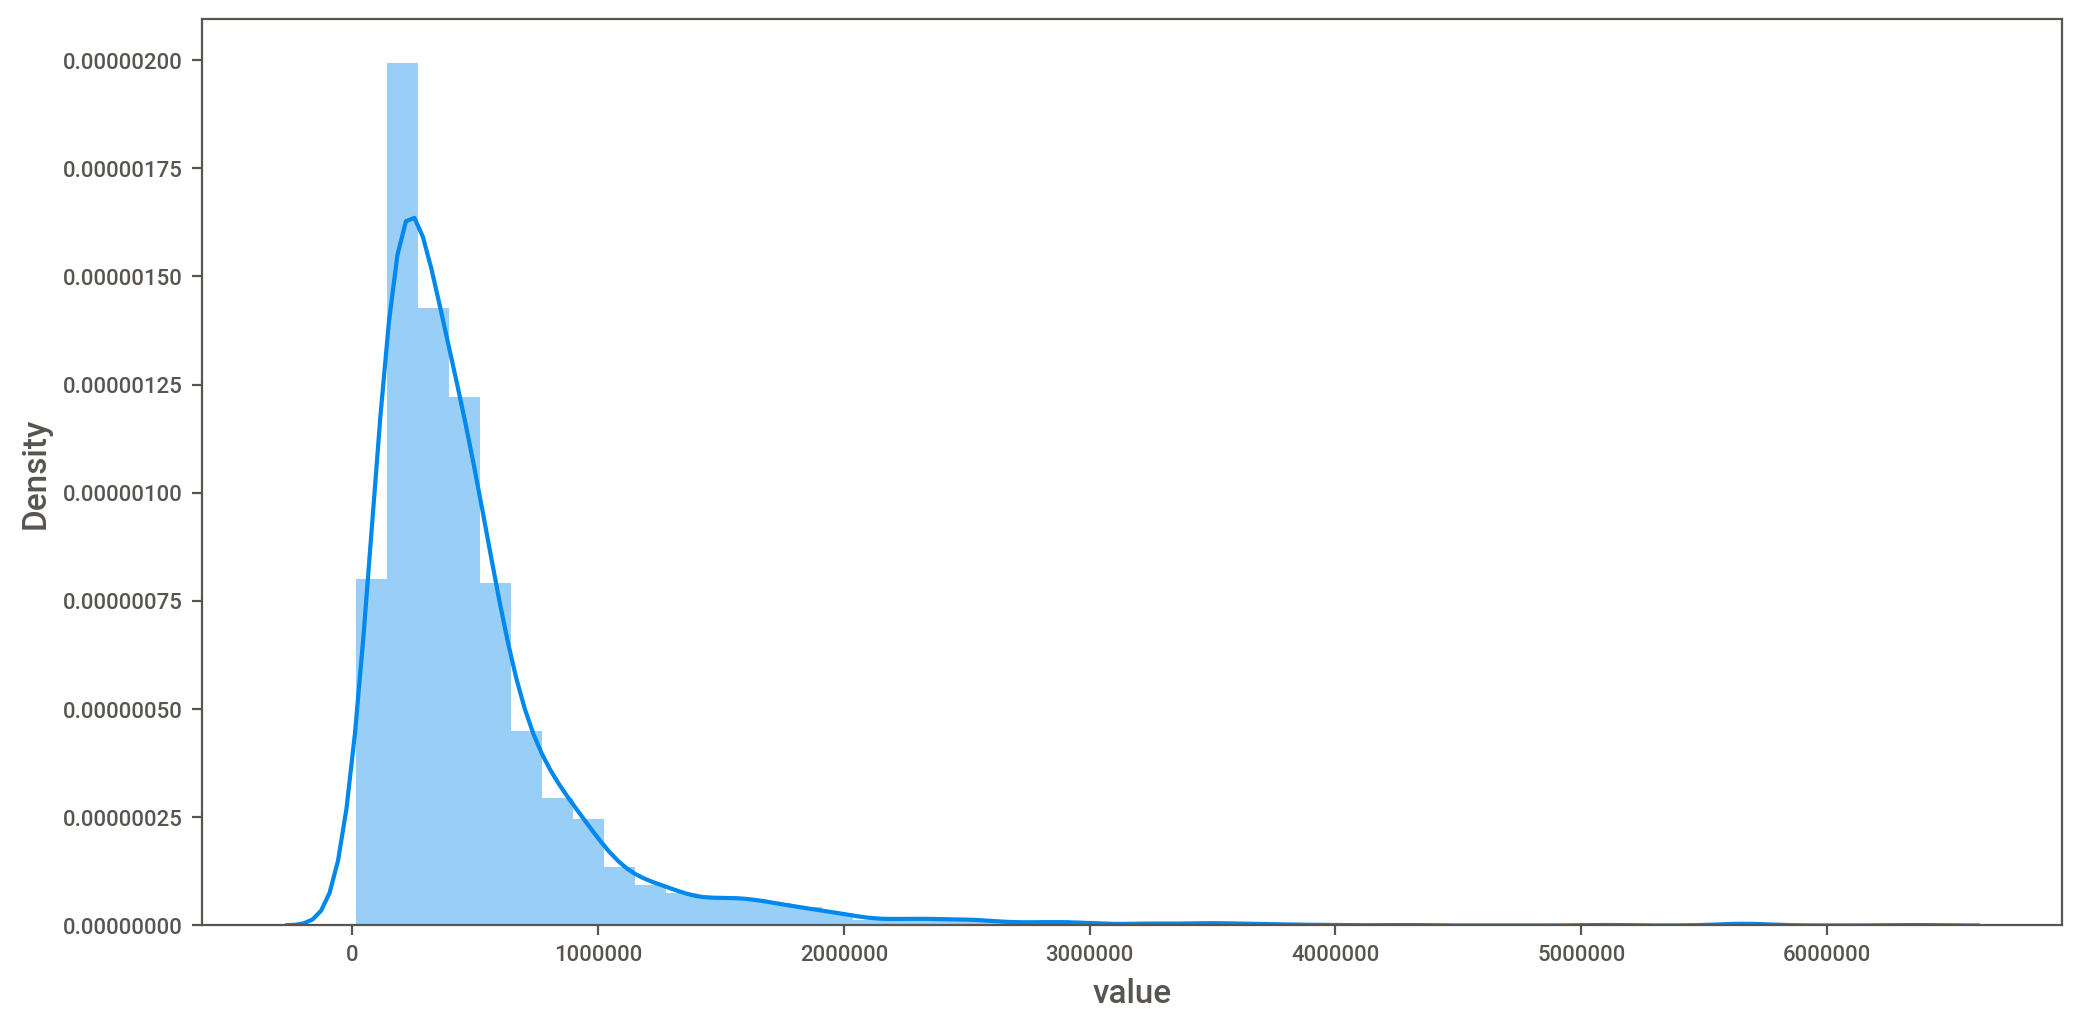

In [120]:
sns.distplot(clean_df["value"])

/Users/prashantkhorana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='squarefoot', ylabel='Density'>

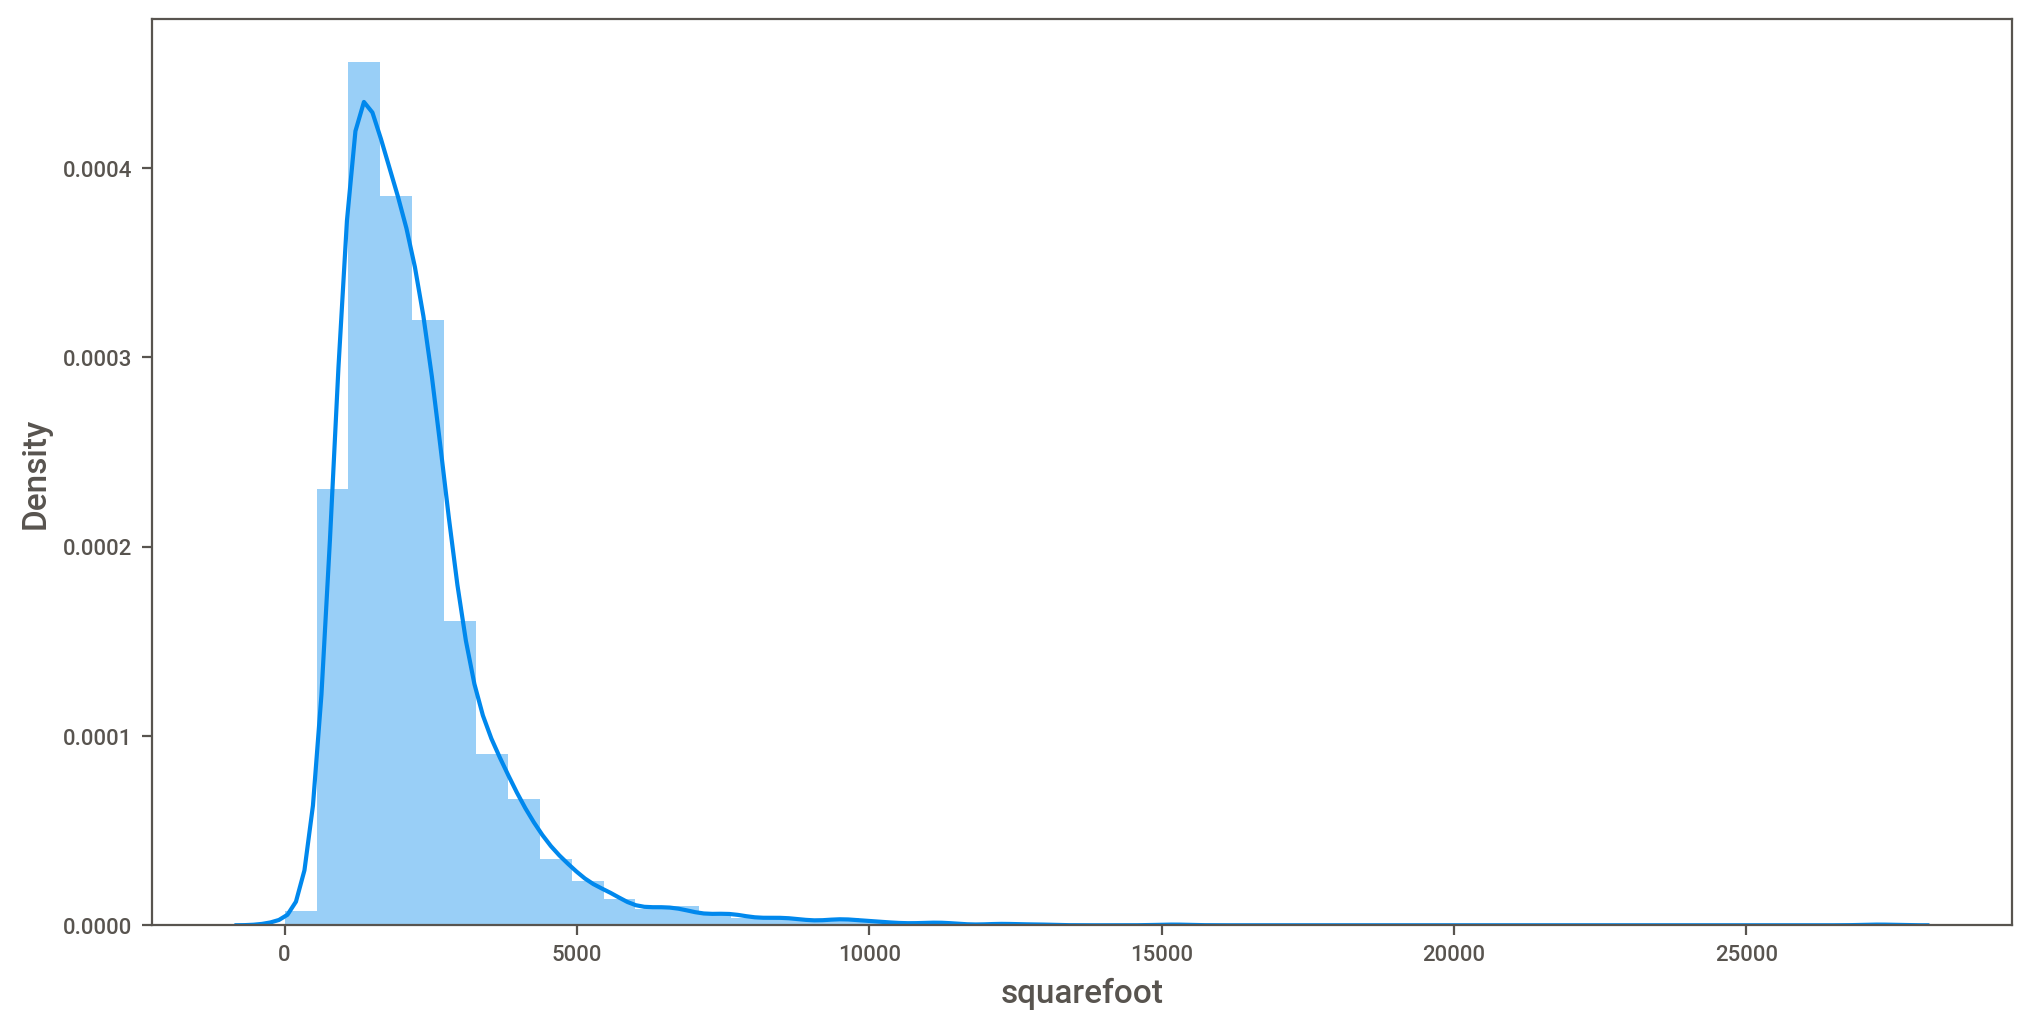

In [125]:
sns.distplot(clean_df["squarefoot"])

<AxesSubplot:xlabel='beds', ylabel='av1'>

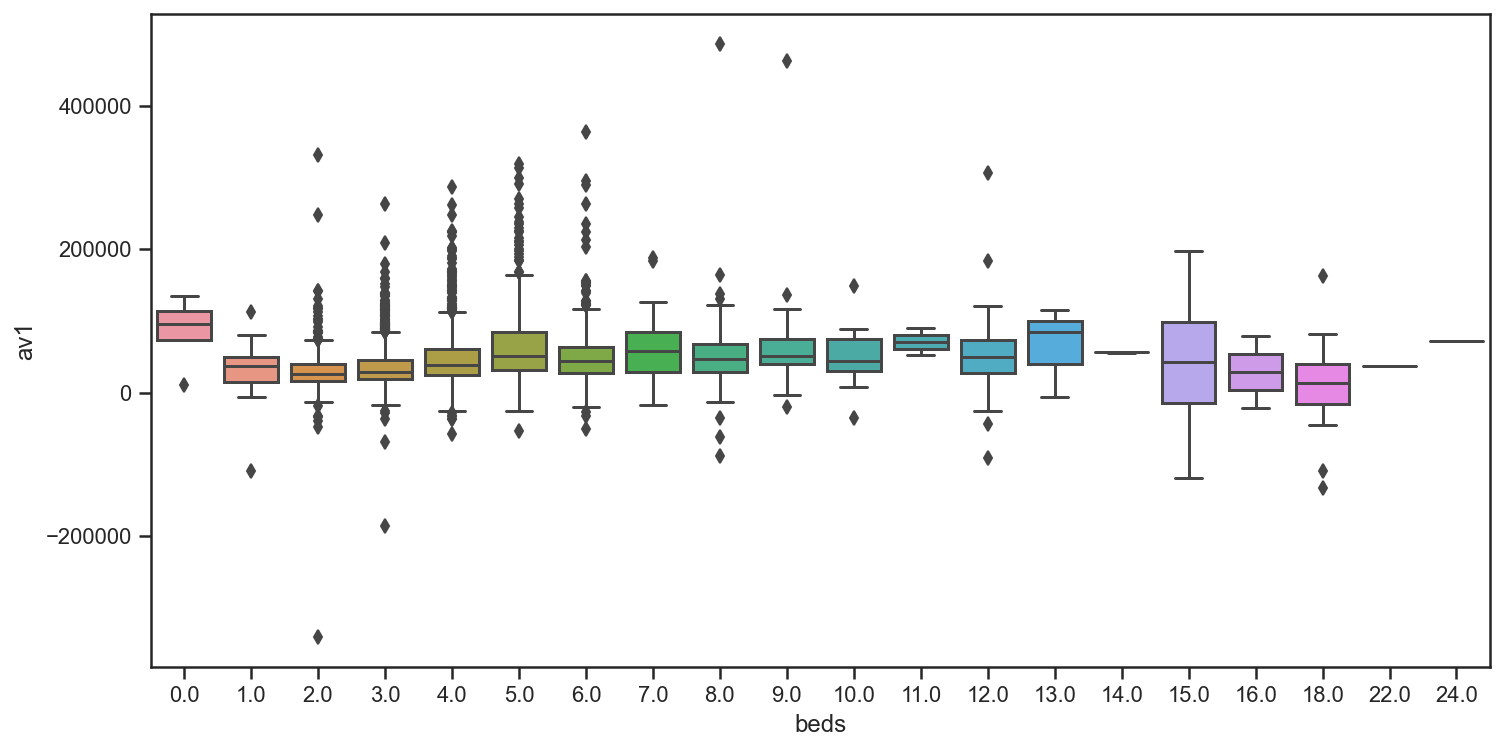

In [104]:
sns.despine(ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
sns.boxplot(data=clean_df,x="beds",y="av1")

<AxesSubplot:xlabel='tri', ylabel='av1'>

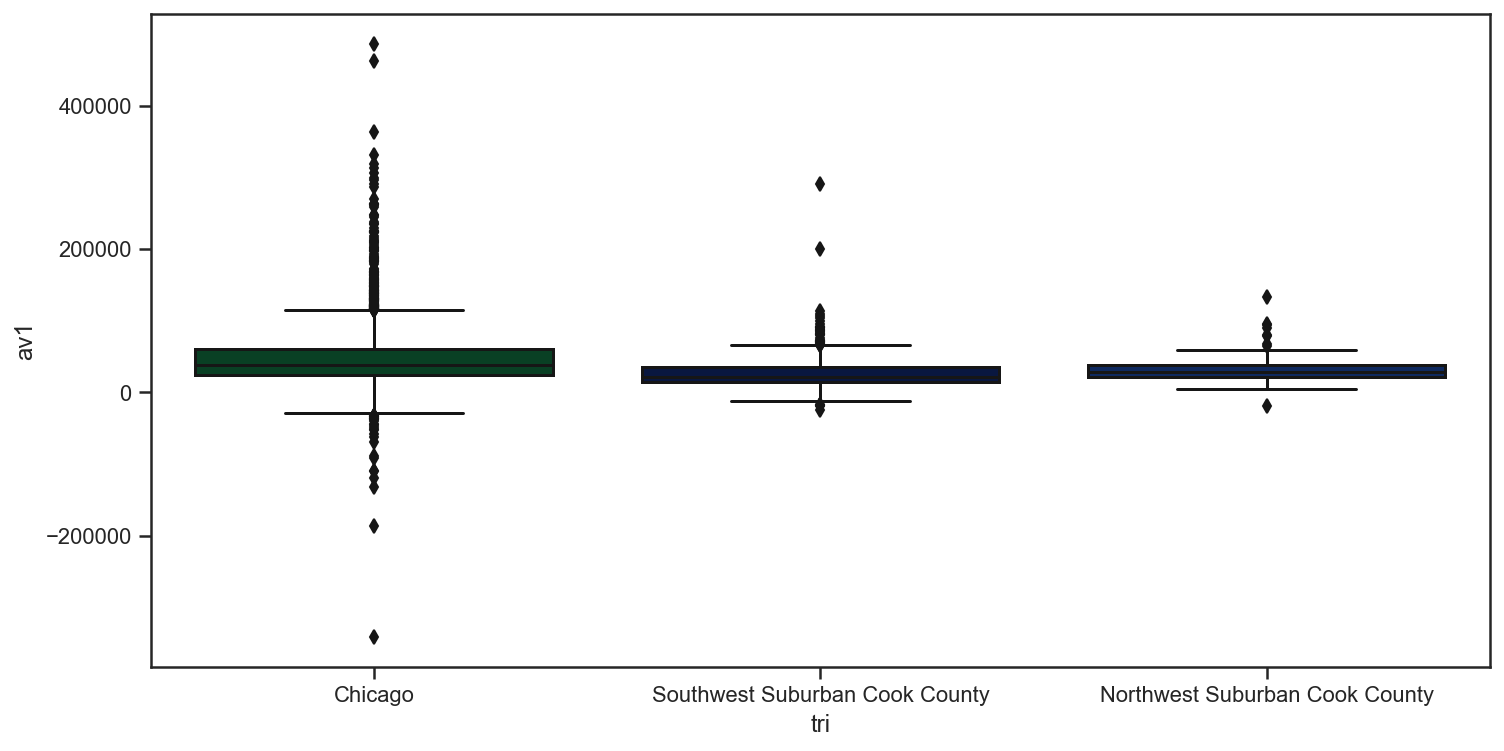

In [103]:
sns.boxplot(data=clean_df,x="tri",y="av1")

<AxesSubplot:xlabel='pdir', ylabel='av1'>

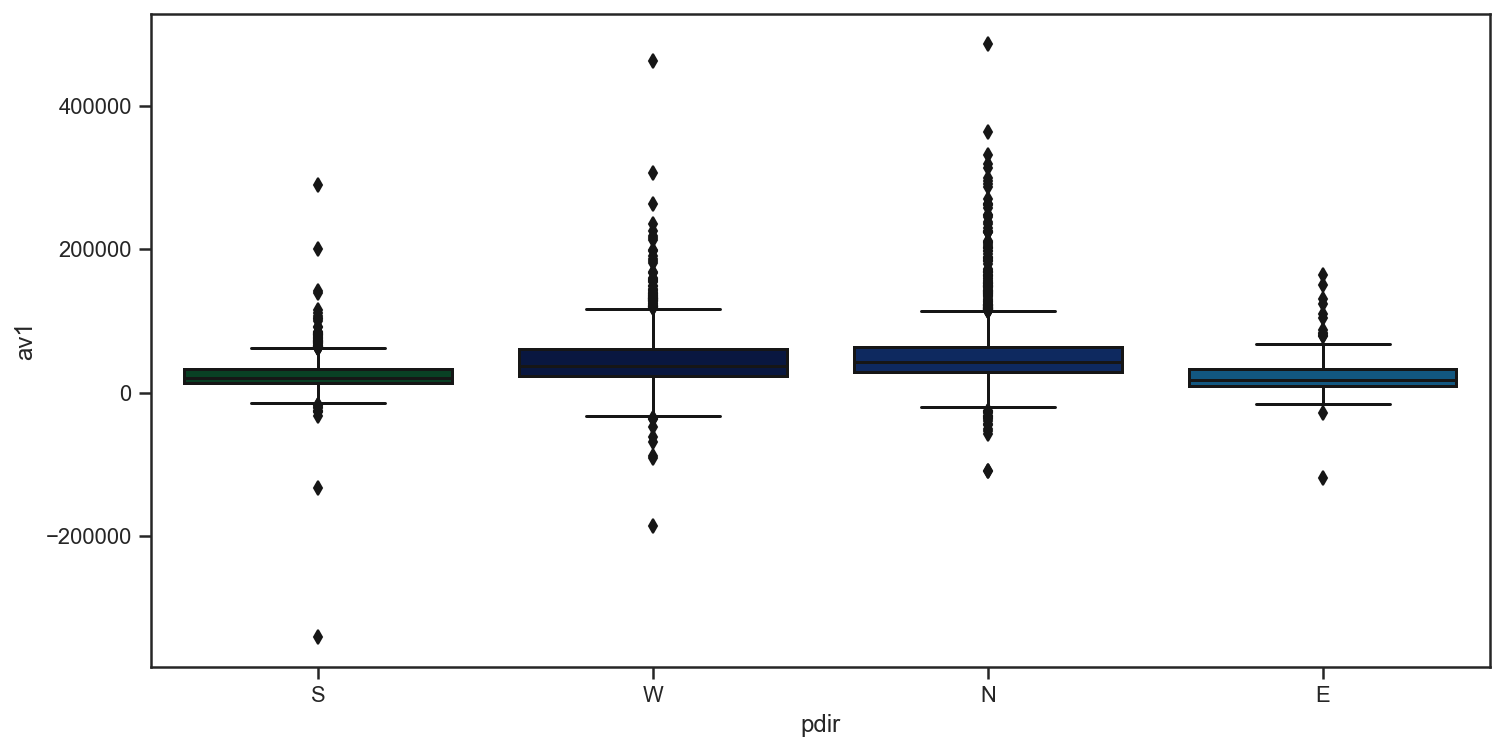

In [59]:
sns.boxplot(data=clean_df,x="pdir",y="av1")

<AxesSubplot:xlabel='condo', ylabel='av1'>

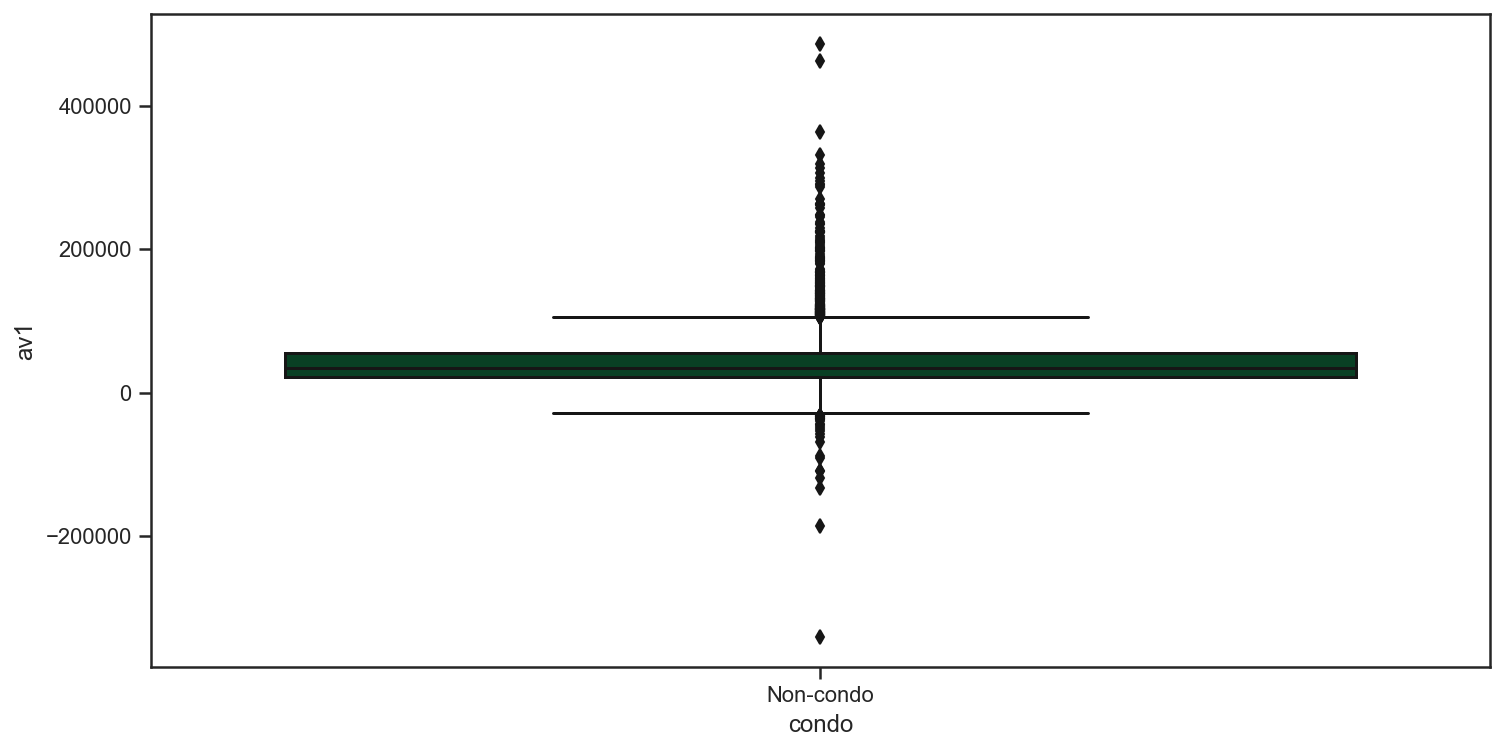

In [60]:
sns.boxplot(data=clean_df,x="condo",y="av1")

<AxesSubplot:xlabel='homeowner', ylabel='av1'>

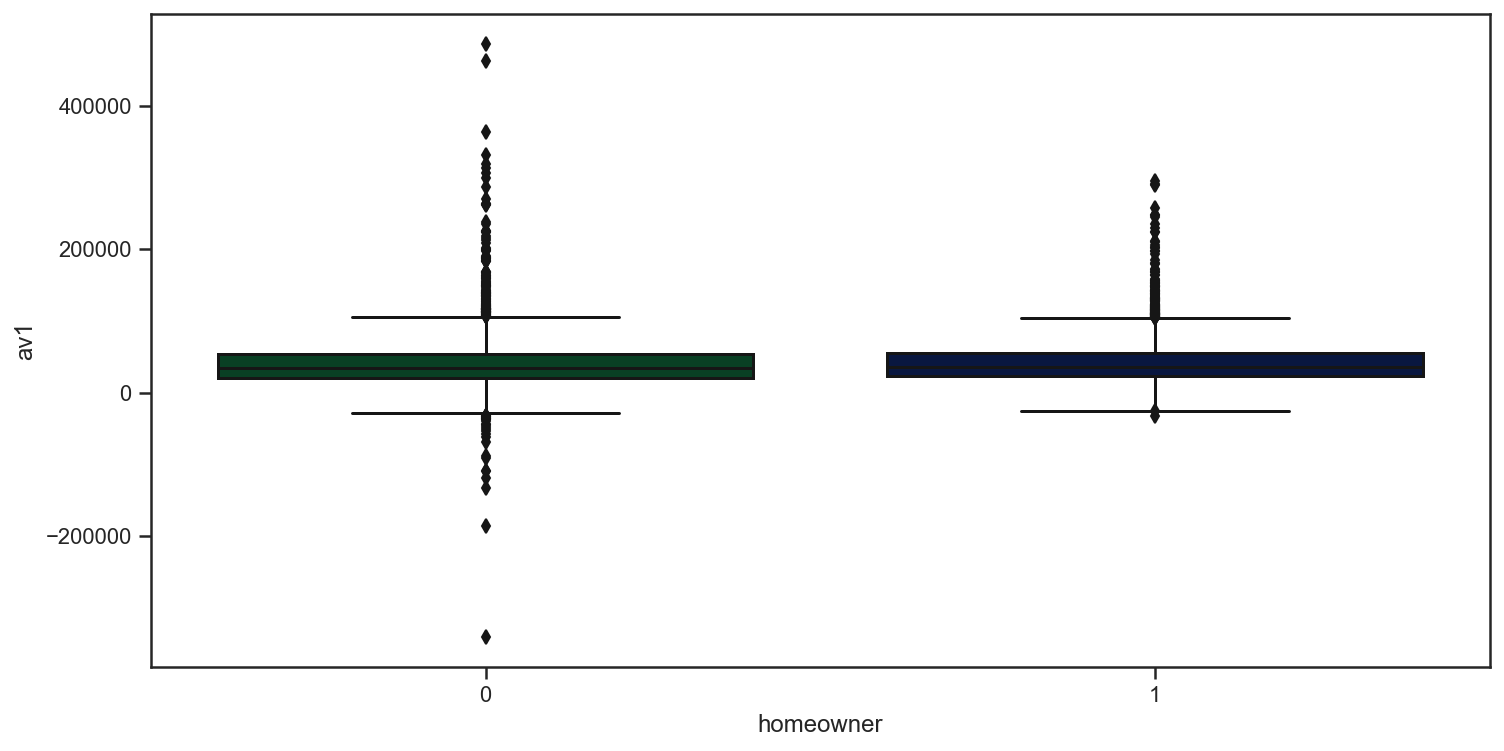

In [61]:
sns.boxplot(data=clean_df,x="homeowner",y="av1")

<AxesSubplot:xlabel='white', ylabel='av1'>

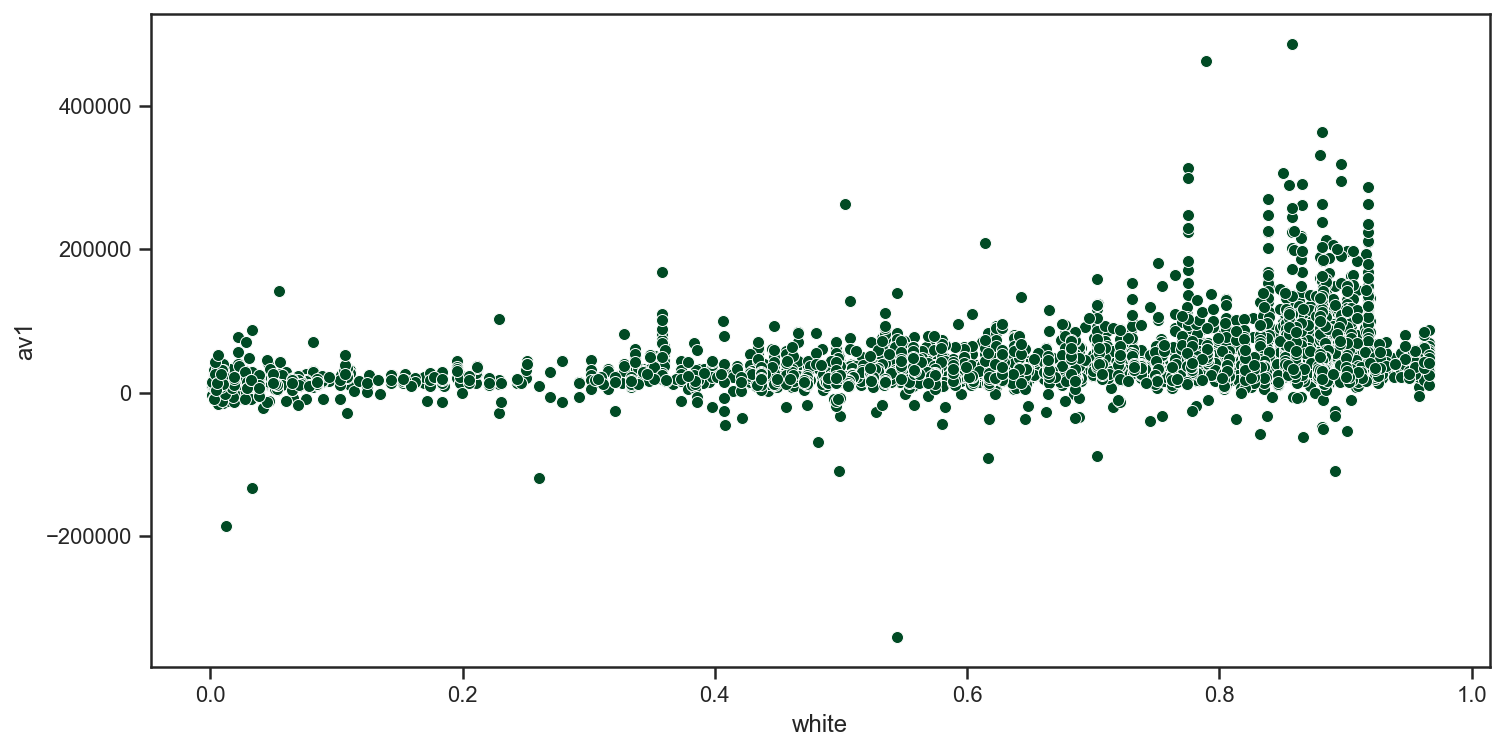

In [63]:
sns.scatterplot(data=clean_df,x="white",y="av1")

<AxesSubplot:xlabel='black', ylabel='av1'>

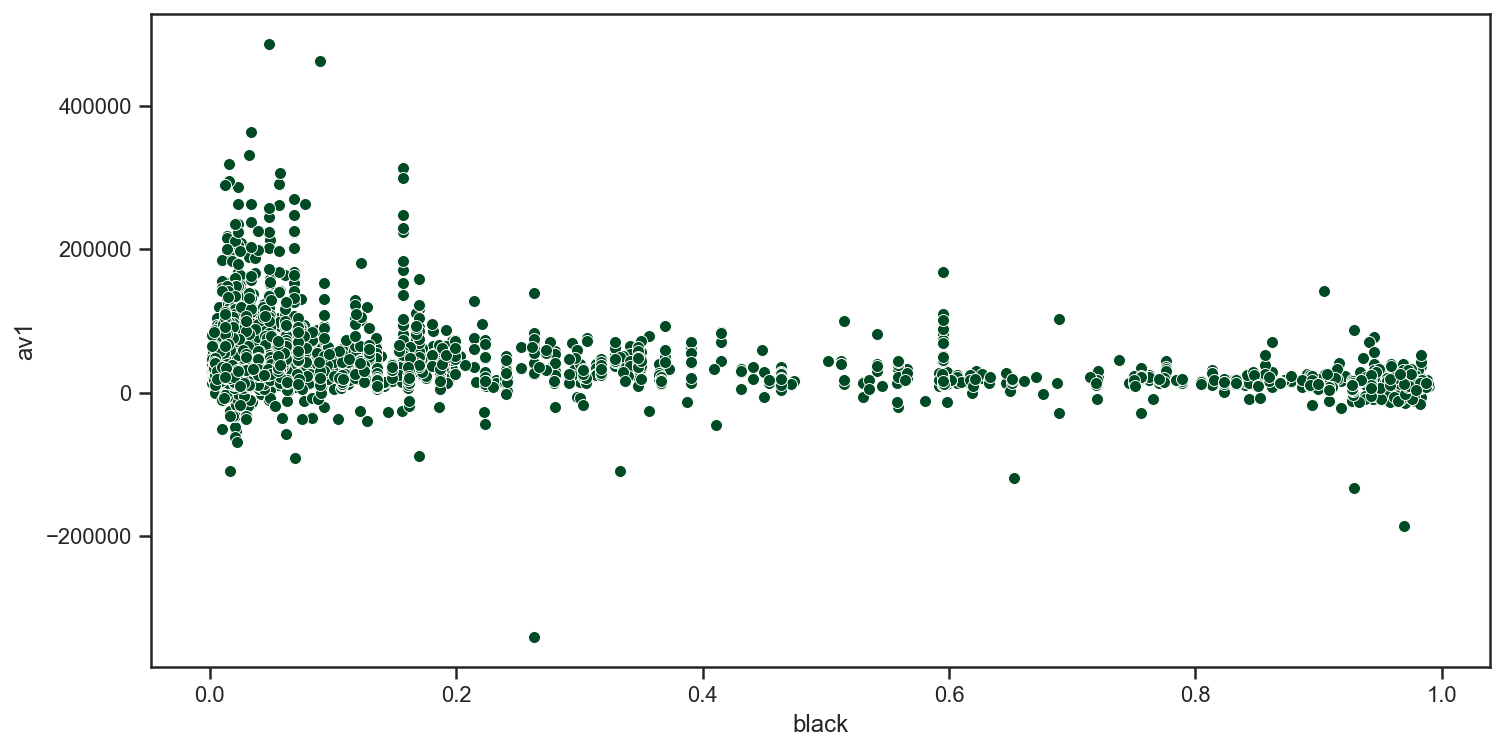

In [64]:
sns.scatterplot(data=clean_df,x="black",y="av1")

<AxesSubplot:xlabel='hispanic', ylabel='av1'>

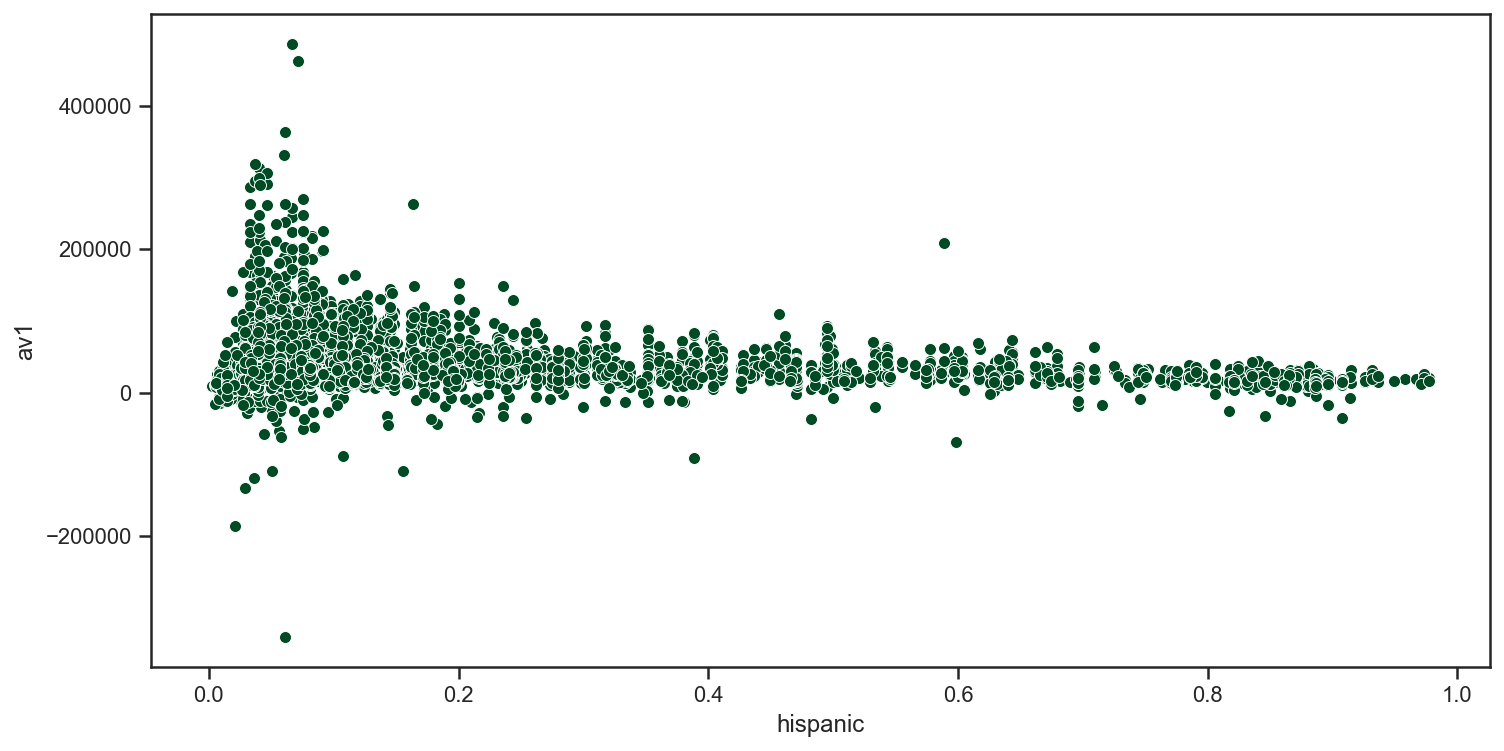

In [65]:
sns.scatterplot(data=clean_df,x="hispanic",y="av1")

<AxesSubplot:xlabel='asian', ylabel='av1'>

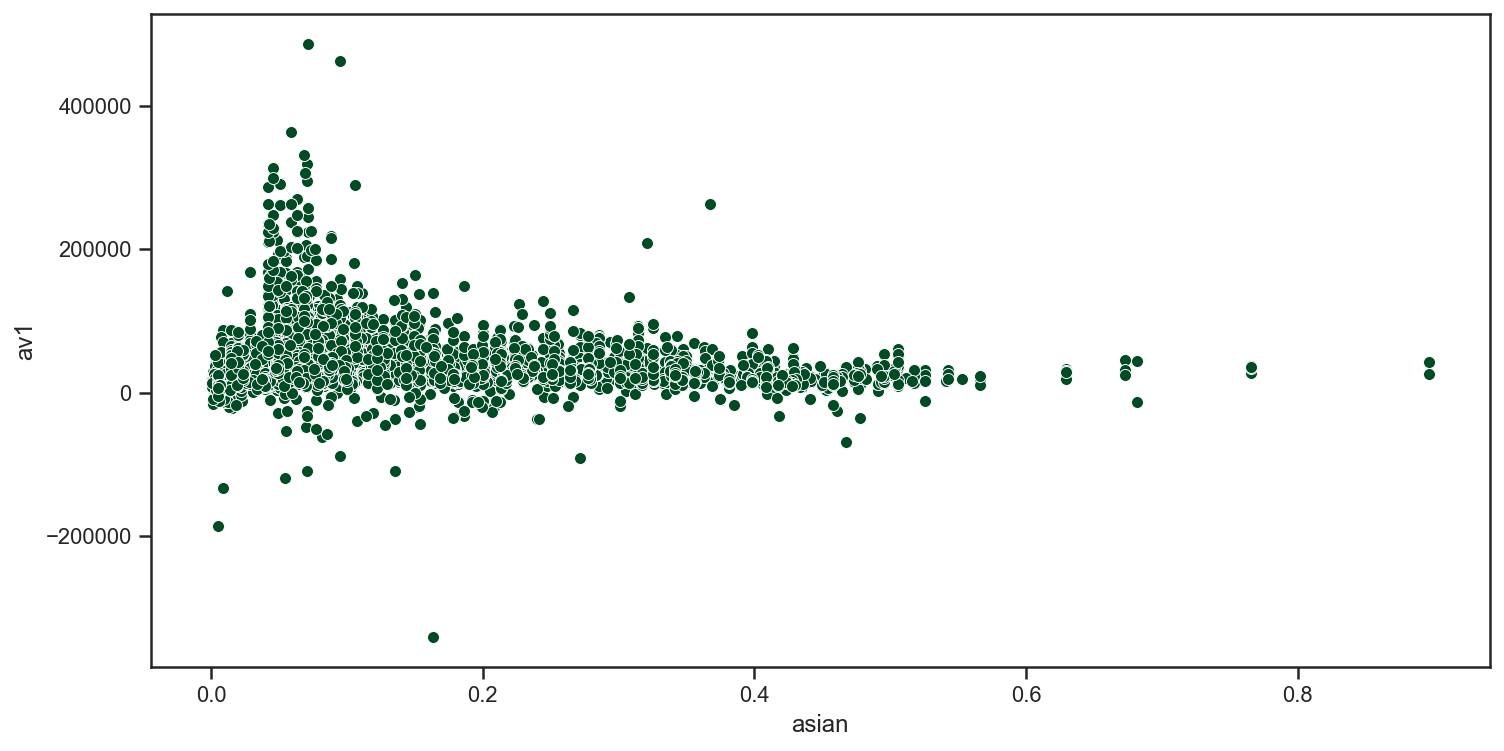

In [71]:
sns.scatterplot(data=clean_df,x="asian",y="av1")

<AxesSubplot:xlabel='medhinc', ylabel='av1'>

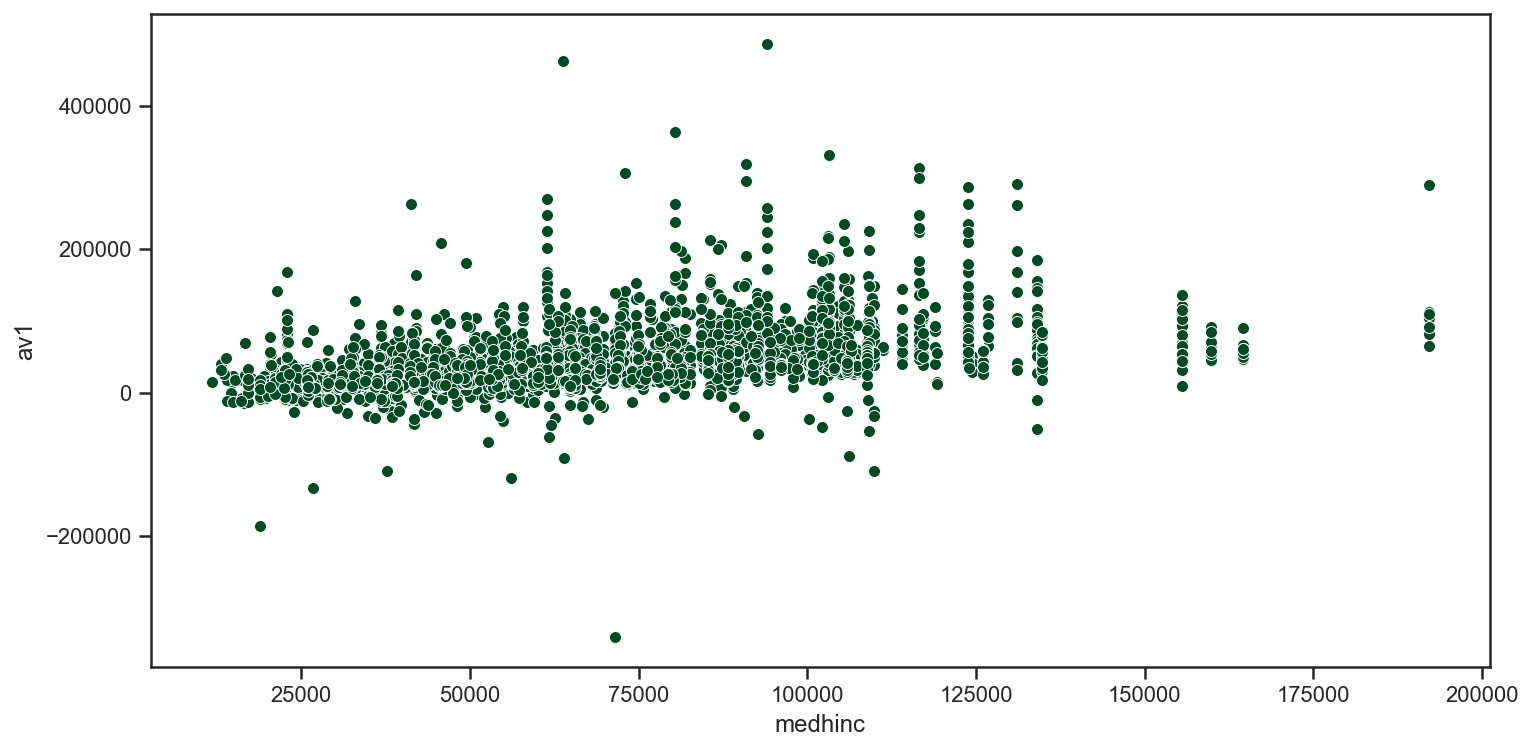

In [66]:
sns.scatterplot(data=clean_df,x="medhinc",y="av1")

<AxesSubplot:xlabel='college', ylabel='av1'>

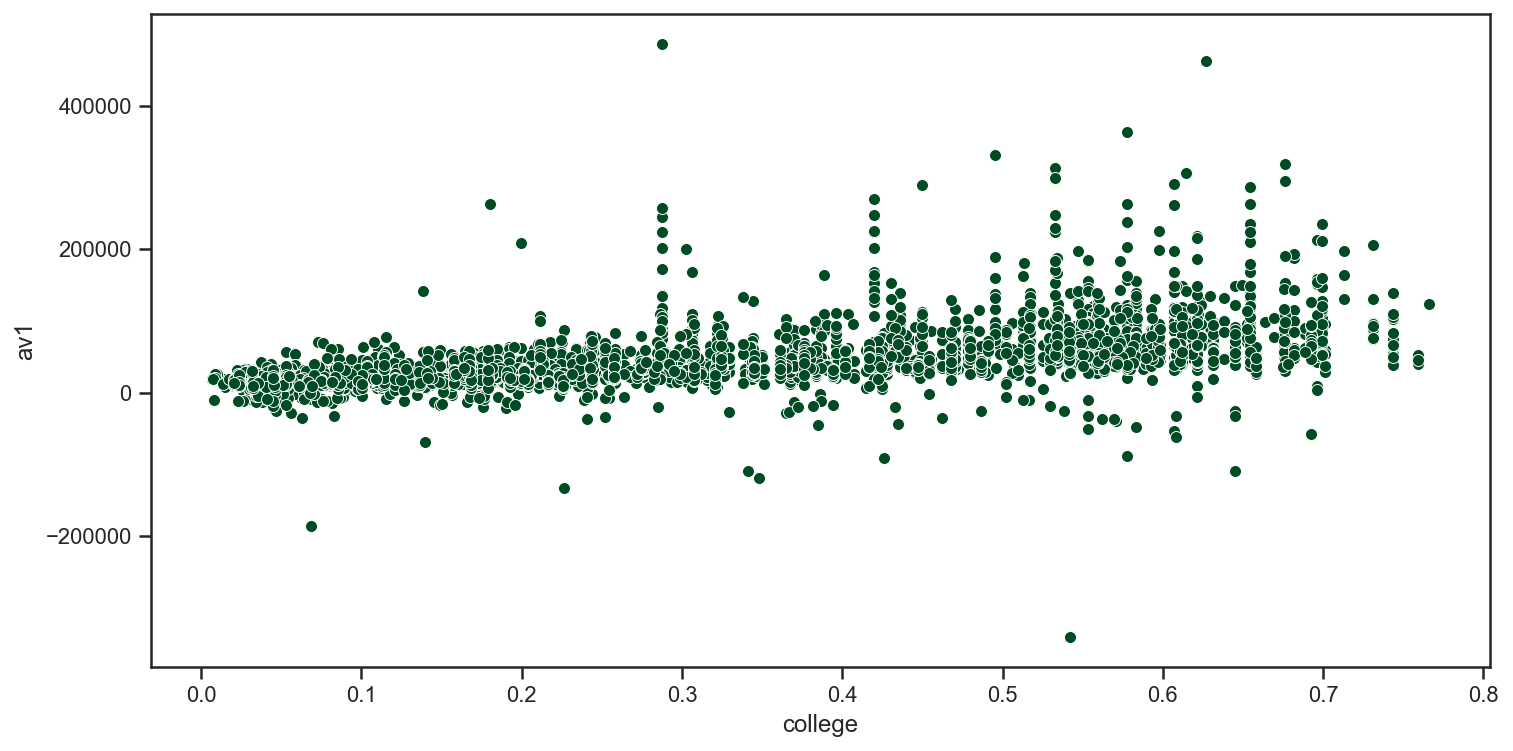

In [67]:
sns.scatterplot(data=clean_df,x="college",y="av1")

<AxesSubplot:xlabel='walkscore', ylabel='av1'>

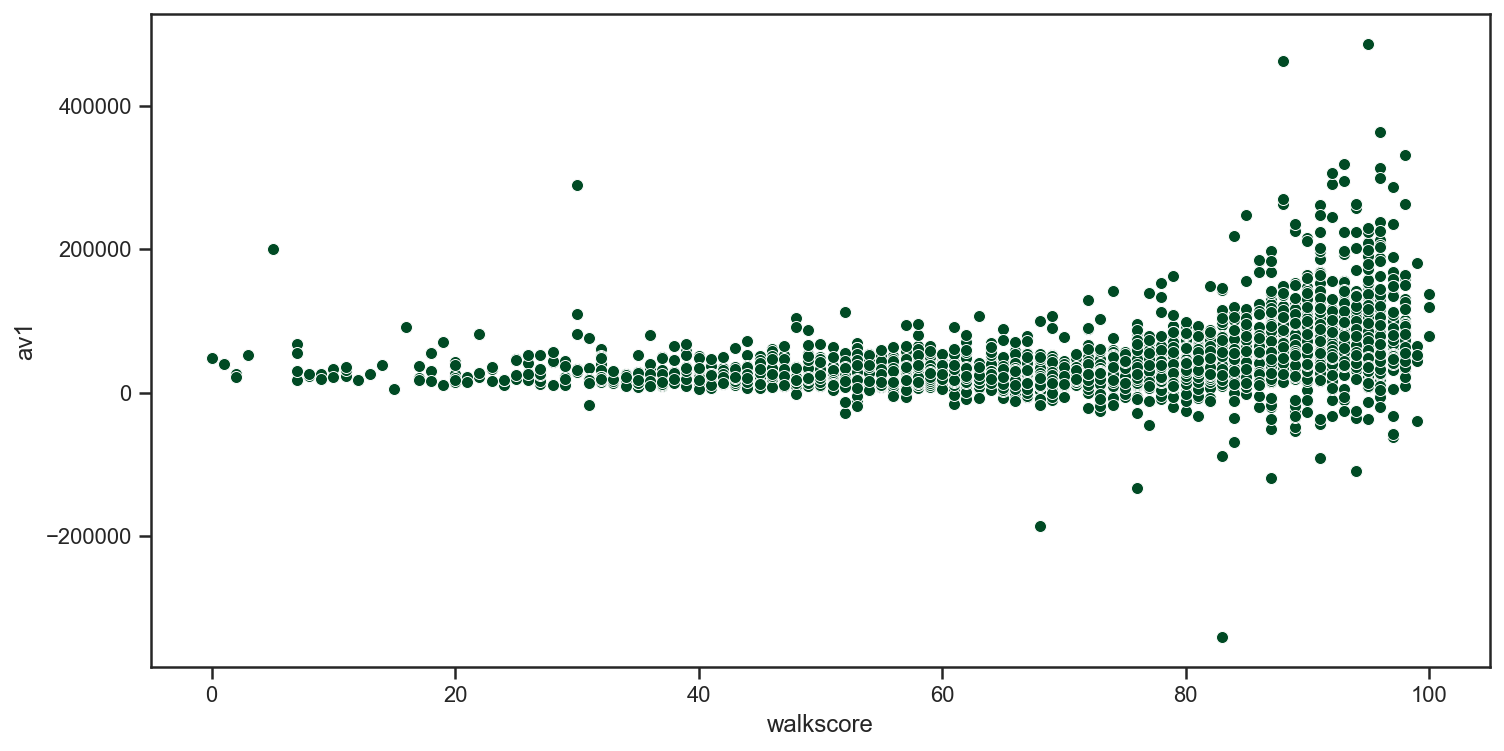

In [68]:
sns.scatterplot(data=clean_df,x="walkscore",y="av1")

<AxesSubplot:xlabel='walkfac', ylabel='av1'>

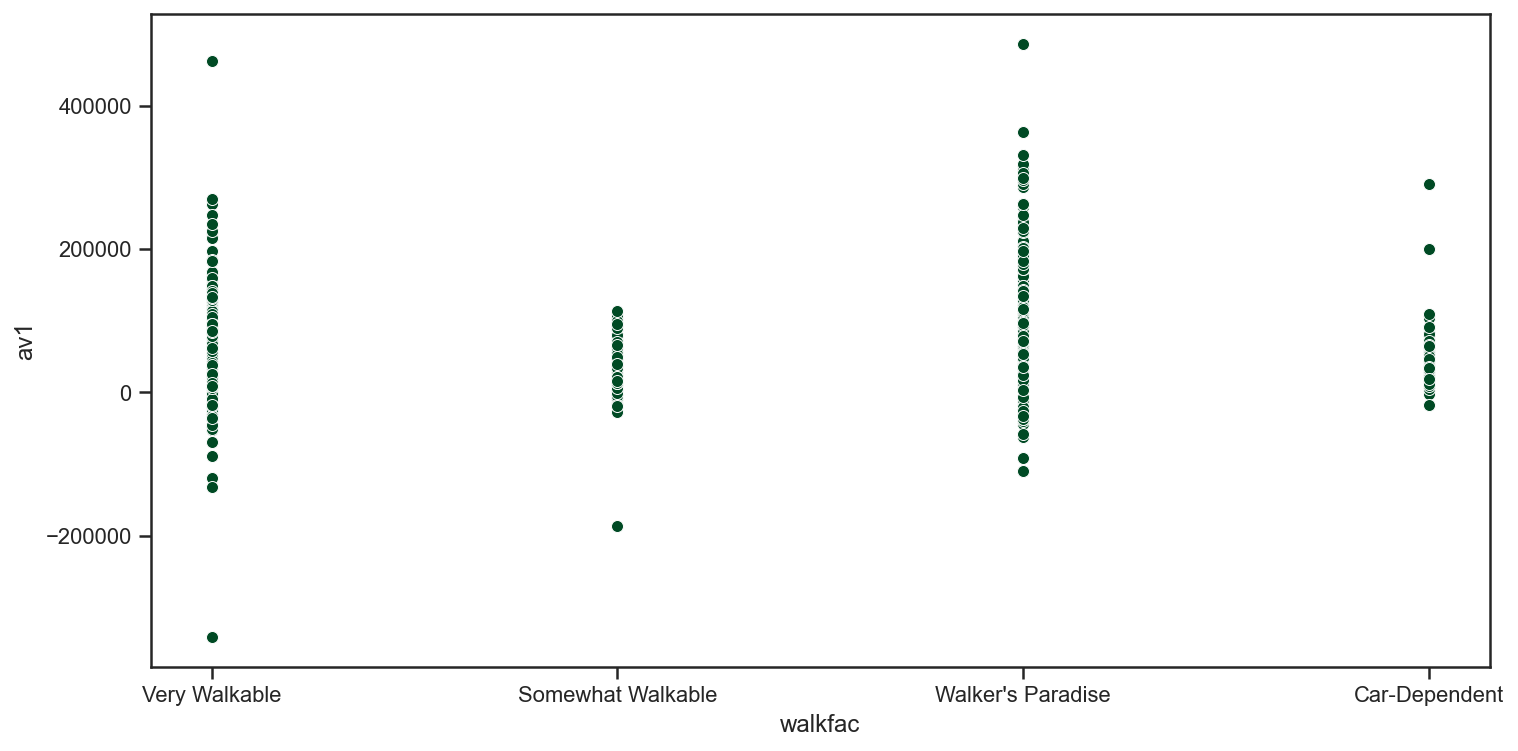

In [69]:
sns.scatterplot(data=clean_df,x="walkfac",y="av1")

<AxesSubplot:xlabel='appeal', ylabel='av1'>

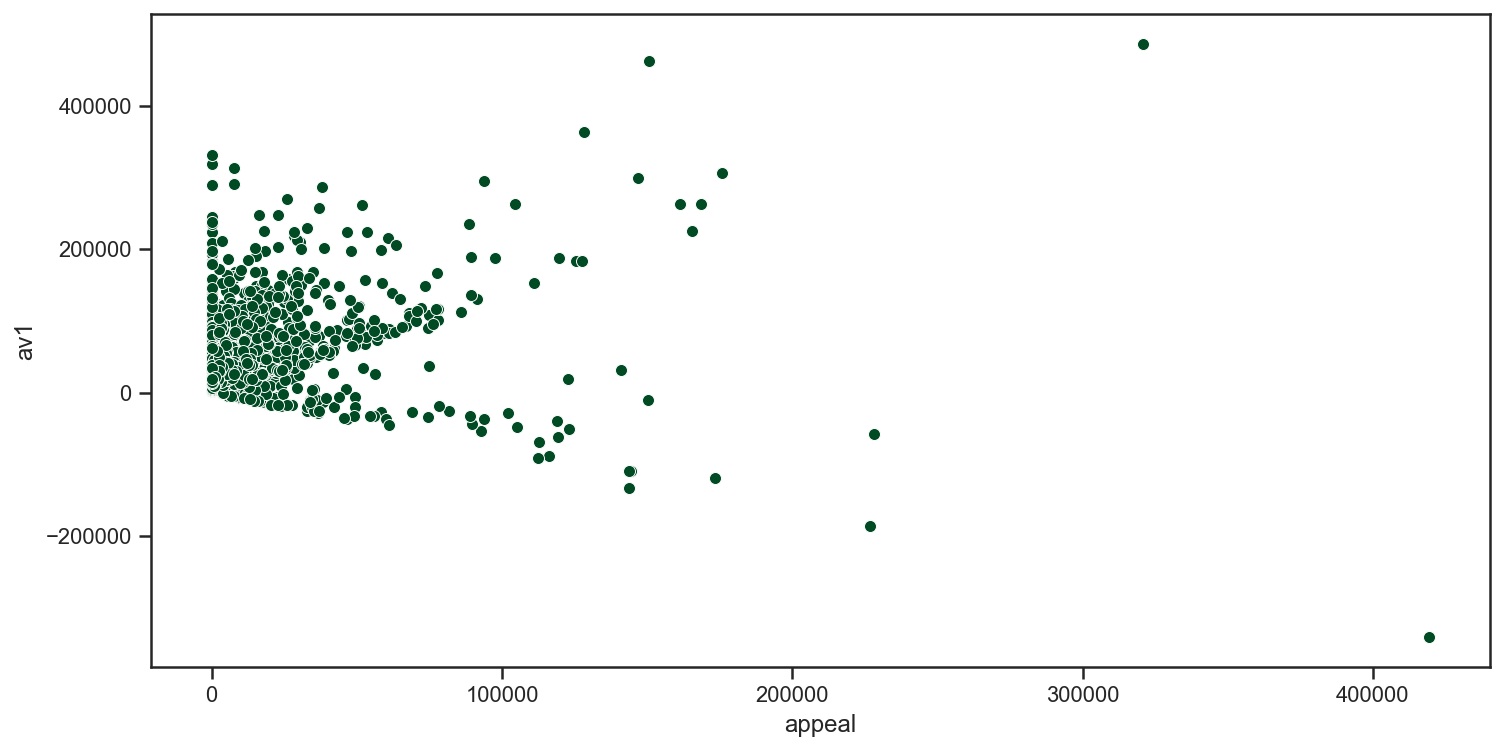

In [73]:
sns.scatterplot(data=clean_df,x="appeal",y="av1")

<AxesSubplot:xlabel='elem_score', ylabel='av1'>

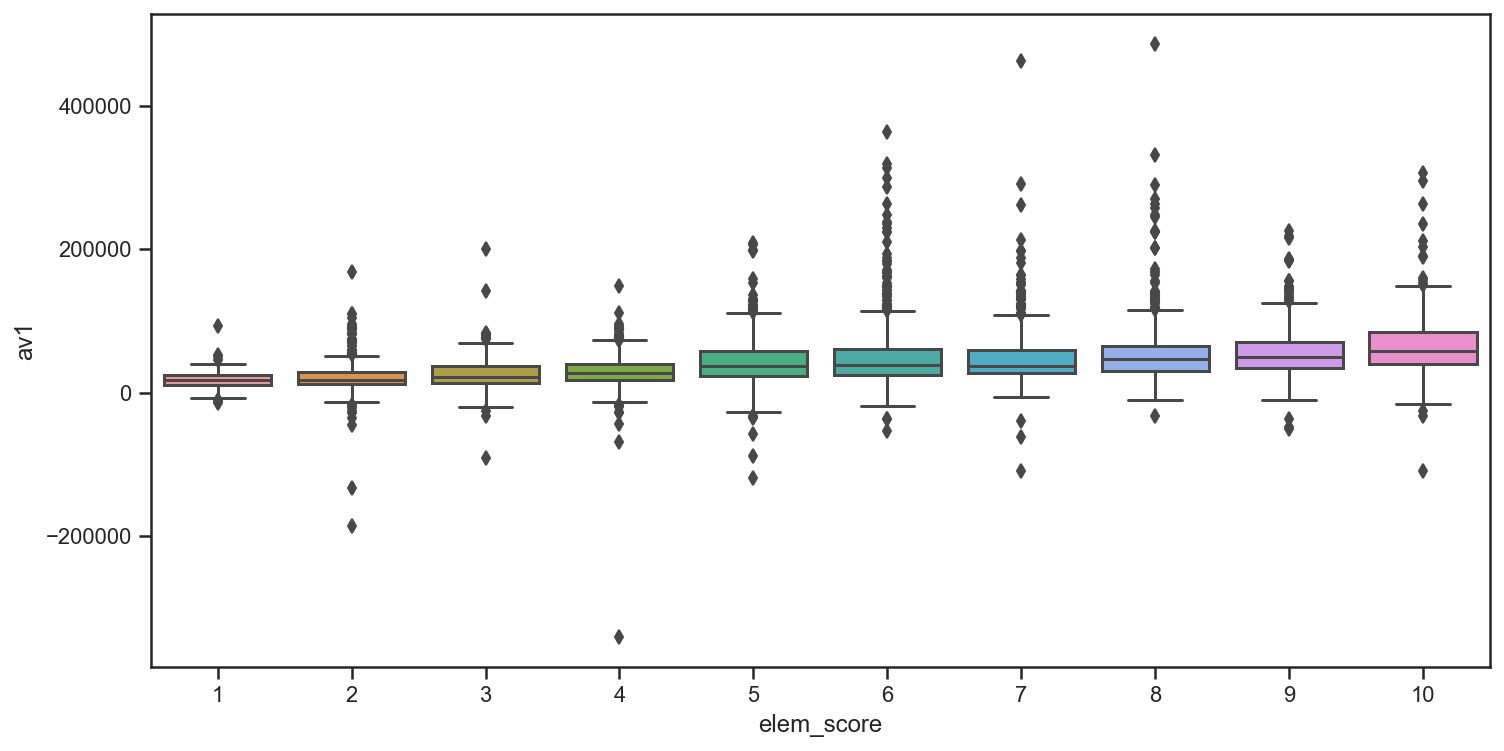

In [79]:
sns.boxplot(data=clean_df,x="elem_score",y="av1")

<AxesSubplot:xlabel='high_school_score', ylabel='av1'>

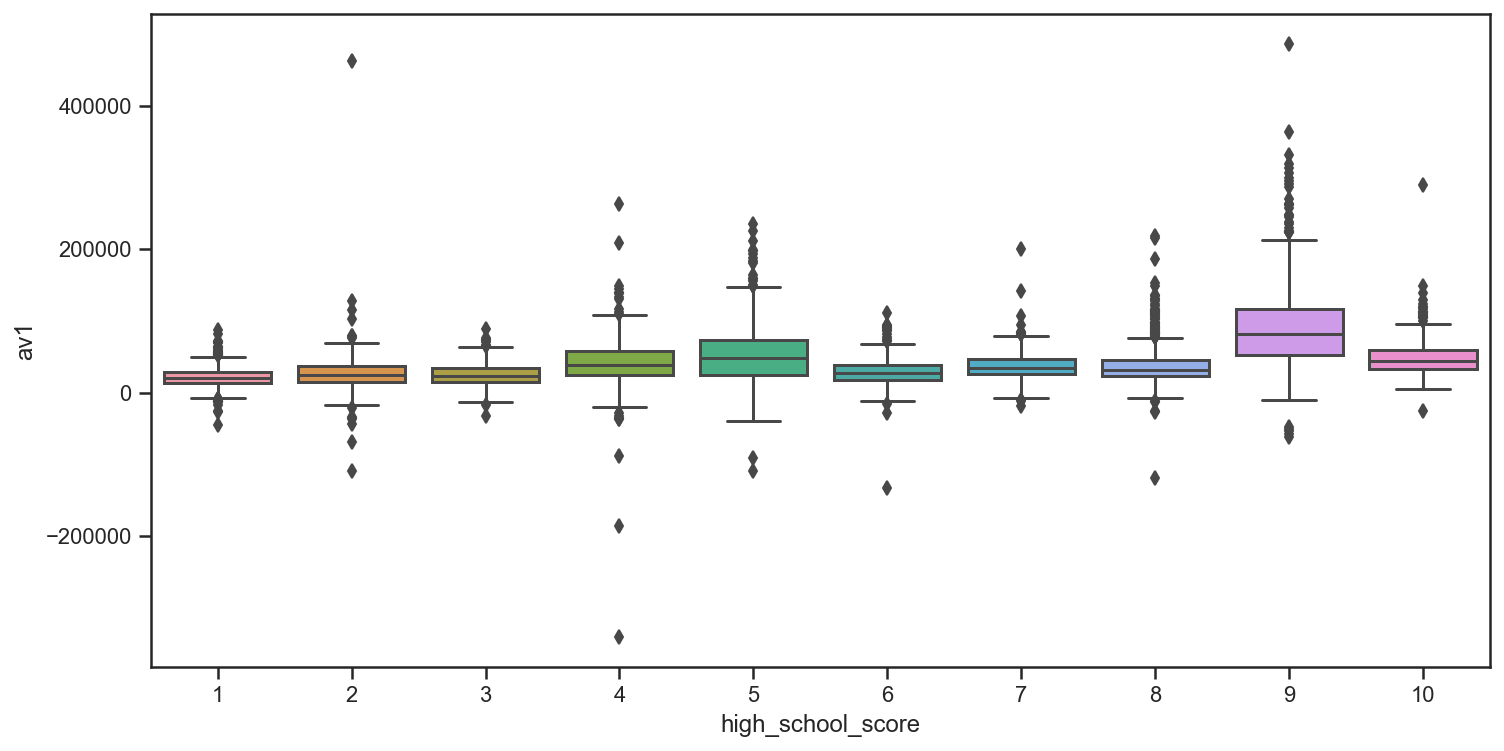

In [77]:
sns.boxplot(data=clean_df,x="high_school_score",y="av1")

<AxesSubplot:xlabel='avg_school_score', ylabel='av1'>

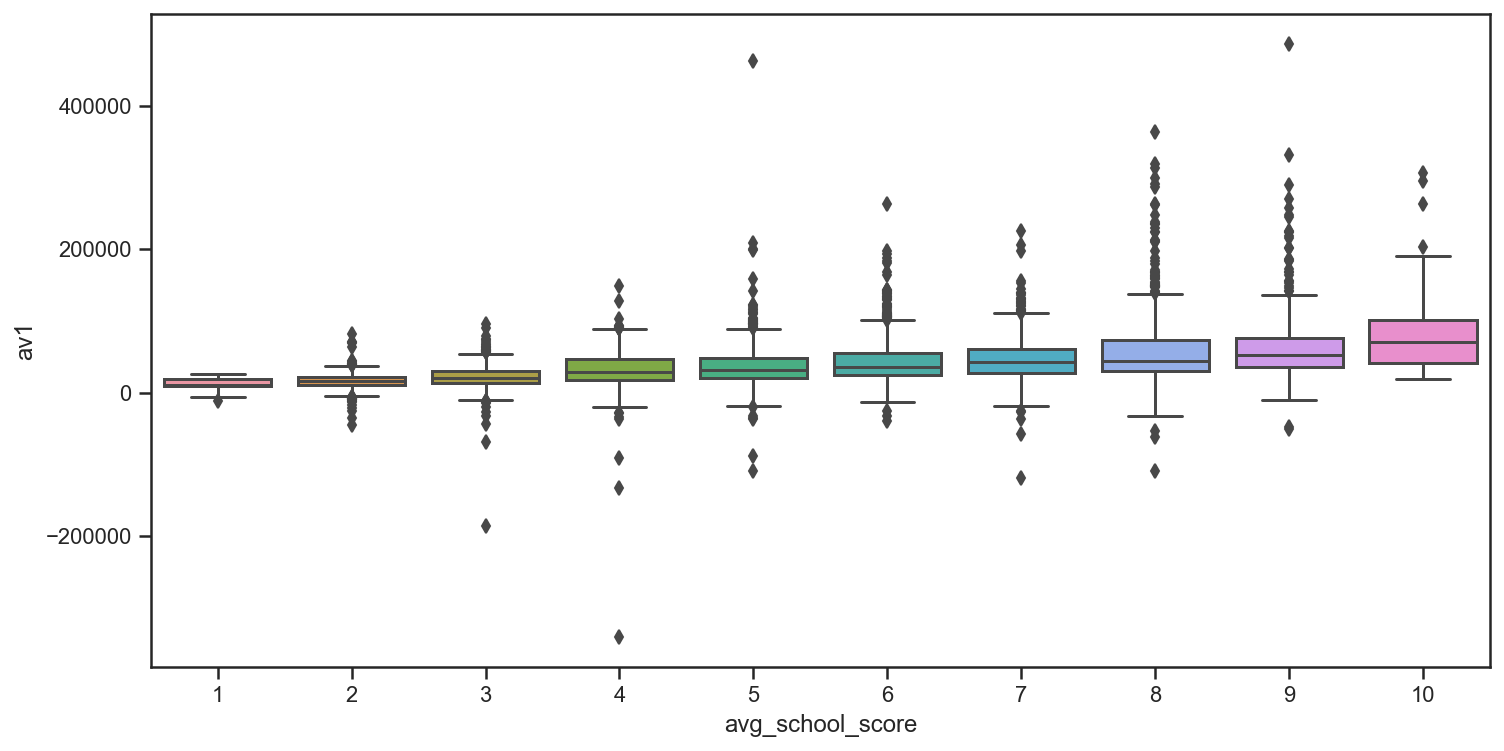

In [84]:
sns.boxplot(data=clean_df,x="avg_school_score",y="av1")

In [105]:
pip install sweetviz


     |████████████████████████████████| 15.1 MB 158 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [107]:
import sweetviz as sv

my_report = sv.analyze(df2)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

/Users/prashantkhorana/opt/anaconda3/lib/python3.8/site-packages/sweetviz/graph_associations.py:208: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  f = corrplot(graph_data, dataframe_report)



Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [109]:
clean_df.dtypes

pin14                 object
tri                   object
pdir                  object
pstreet               object
pcity                 object
tcity                 object
condo                 object
av1                  float64
value                  int64
taxes                float64
homeowner              int64
white                float64
black                float64
hispanic             float64
asian                float64
medhinc              float64
poverty              float64
college              float64
squarefoot           float64
beds                 float64
walkscore              int64
walkfac               object
elem_score             int64
high_school_score      int64
avg_school_score       int64
appeal               float64
dtype: object

In [123]:
clean_df["log_value"]=np.log(clean_df["value"])

<ipython-input-123-5de2cb540e76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["log_value"]=np.log(clean_df["value"])


In [126]:
clean_df["log_squarefoot"]=np.log(clean_df["squarefoot"])

FloatingPointError: divide by zero encountered in log

In [124]:
formula = 'av1 ~ squarefoot + log_value + taxes + walkscore  + college  + white + black + elem_score + high_school_score + avg_school_score - 1'
linear_areas_only = smf.ols(formula=formula, data=clean_df).fit()
linear_areas_only.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    av1   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              2606.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:17:57   Log-Likelihood:                         -45871.
No. Observations:                4023   AIC:                                  9.176e+04
Df Residuals:                    4013   BIC:                                  9.183e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
squarefoot           -0.0650      0.260     -0.250      0.802      -0.574       0.444
log_value           668.0163    296.932      2.250      0.025      85.865    1250.168
taxes                 5.7509      0.085     67.671      0.000       5.584       5.918
walkscore            65.4482     26.357      2.483      0.013      13.773     117.123
college            2.092e+04   2824.461      7.408      0.000    1.54e+04    2.65e+04
white             -2.043e+04   3690.130     -5.535      0.000   -2.77e+04   -1.32e+04
black             -2.024e+04   2766.834     -7.315      0.000   -2.57e+04   -1.48e+04
elem_score        -1705.2736    752.009     -2.268      0.023   -3179.629    -230.918
high_school_score -1650.8340    705.403     -2.340      0.019   -3033.815    -267.853
avg_school_score   3804.5690   1395.545      2.726      0.006    1068.525    6540.613
==============================================================================
Omnibus:                     1445.730   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           589449.923
Skew:                          -0.211   Prob(JB):                         0.00
Kurtosis:                      62.298   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""